# R for Data Science Meeting 3 (6/8/22)

Welcome to the third class in the R for Data Science Summer Series, developed for the Walton Lab! In this meeting, we will primarily be working on data manipulation with dplyr. We will also briefly review last week's meeting.

Learning Objectives:
- Review last weeks meeting (data structures and subsetting). 12:00-12:10.
- Apply common dplyr functions to manipulate data in R:
    - select(). 12:10-12:15.
    - filter(). 12:15-12:20.
    - pipes (%>%). 12:20-12:25.
    - mutate(). 12:25-12:30.
    - group_by() and summarize() (split-apply-combine). 12:30-12:40.
- Work together to manipulate behavioral data using dplyr functions. 12:40-1:00.

Check out the dplyr cheatsheet: https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf

As a supplementary resource, please see the R for Data Science book by Hadley Wickham (https://r4ds.had.co.nz/index.html). We will not be directly using this book for meetings, but it will prove to be a handy resource as you continue down the path of data science.

Also, I'm giving credit to François Michonneau & Auriel Fournier (https://datacarpentry.org/R-genomics/04-dplyr.html) for their dplyr lesson.

## Review of Last Week's Meeting

In [1]:
# load packages into our environment
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# create a vector of animal weights
weight_g <- c(23, 27, 32, 35, 51, 57)
print(weight_g)

[1] 23 27 32 35 51 57


In [3]:
# use class, str, summary, unique, and length to inspect data
class(weight_g)
str(weight_g)
summary(weight_g)
unique(weight_g)
length(weight_g)

[1] "numeric"

 num [1:6] 23 27 32 35 51 57


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.00   28.25   33.50   37.50   47.00   57.00 

[1] 23 27 32 35 51 57

[1] 6

In [4]:
# subset vector using multiple conditions
weight_g[weight_g > 50 & weight_g < 55]

[1] 51

In [5]:
# subset vector, using a vector
weight_g[weight_g %in% c(23, 32, 57)]

[1] 23 32 57

In [6]:
# deal with NAs
heights <- c(2, 4, 4, NA, 6)
# mean and max calculations won't work since there is an NA.
mean(heights)
max(heights)
mean(heights, na.rm = TRUE)
max(heights, na.rm = TRUE)
# can also use other techniques/functions to remove NAs
heights[!is.na(heights)]
na.omit(heights)
heights[complete.cases(heights)]

[1] NA

[1] NA

[1] 4

[1] 6

[1] 2 4 4 6

[1] 2 4 4 6
attr(,"na.action")
[1] 4
attr(,"class")
[1] "omit"

[1] 2 4 4 6

In [7]:
# create a list
animal.id <- c(1, 2, 3, 4)
animal.name <- c("Jeff", "Bettie", "Scott", "Emma")
number.of.animals <- 4
animal.list <- list(animal.id, animal.name, number.of.animals)
print(animal.list)

[[1]]
[1] 1 2 3 4

[[2]]
[1] "Jeff"   "Bettie" "Scott"  "Emma"  

[[3]]
[1] 4



In [8]:
# subset list
animal.list[[2]]

[1] "Jeff"   "Bettie" "Scott"  "Emma"

In [9]:
# create a data.table
Name <- c("Amiya", "Raj", "Amelia")
Language <- c("R", "Python", "Java")
Age <- c(22, 25, 45)
df <- data.table(Name, Language, Age)
print(df)

     Name Language Age
1:  Amiya        R  22
2:    Raj   Python  25
3: Amelia     Java  45


In [10]:
# subset data.table
df[Age == 22]

Name  Language Age
1 Amiya R        22

In [11]:
df[Age != 22]

Name   Language Age
1 Raj    Python   25 
2 Amelia Java     45

In [12]:
df[Language %in% c("R", "Java")]

Name   Language Age
1 Amiya  R        22 
2 Amelia Java     45

In [18]:
# load in behavioral dataset
dats.ppi <- fread("../data/ppi_3.8.22.csv")
dats.ppi

file.name                experiment.name  schedule.file                
1     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
2     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
3     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
4     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
5     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
6     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
7     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
8     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
9     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
10    09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
11    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
12    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
13    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
14    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
15    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
16    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
17    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
18    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
19    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
20    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
21    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
22    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
23    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
24    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
25    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
26    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
27    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
28    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
29    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
30    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
⋮     ⋮                        ⋮                ⋮                            
81844 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81845 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81846 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81847 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81848 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81849 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81850 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81851 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81852 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81853 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81854 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81855 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81856 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81857 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81858 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81859 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81860 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81861 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81862 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81863 10052021_20NBPSIN_1711

In [14]:
# inspect behavioral dataset with names() (shows all column names)
names(dats.ppi)

[1] "file.name"           "experiment.name"     "schedule.file"      
 [4] "ToneFreq"            "FloordB"             "protocol"           
 [7] "animal.id"           "Strain"              "awt_months"         
[10] "awt_days"            "Sex"                 "dot"                
[13] "PPdB"                "ppi.std"             "ppi.std.sem"        
[16] "method"              "metric"              "N.ref.startles"     
[19] "N.inhib.startles"    "N.ref.nonstartles"   "N.inhib.nonstartles"
[22] "per.startles.ref"    "per.startles.inhib"  "mean.metric.ref"    
[25] "mean.metric.inhib"

In [15]:
# find unique values for age in months (awt_months)
unique(dats.ppi$awt_months)

[1] 24 23 21 22 19 20 27 28 18 26 25 16 15 17  3  5  6  2  1 13 14 12  4 10  9
[26] 11  7  8

In [16]:
# pro tip: you can wrap functions inside of functions.
# in this case we will wrap sort outside of unique.
# this allows us to see the unique ages in order.
sort(unique(dats.ppi$awt_months))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28

In [17]:
# create a multi-conditioned filter
dats.ppi[awt_months == 20 & ToneFreq == 8000 & ppi.std > 0.9]
# only mice that were 20 months of age, tested at 8 kHz, and have a
# PPI higher than 90%.

file.name              experiment.name  schedule.file         ToneFreq
1  07282021_8TP_1744      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
2  07282021_8TP_1744      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
3  07302021_8TPSIN_1744   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
4  07302021_8TPSIN_1744   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
5  07302021_8TPSIN_1744   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
6  08022021_8TPSIN_1744   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
7  08022021_8TPSIN_1744   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
8  08022021_8TPSIN_1744   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
9  09242021_8APTPSIN_1770 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
10 09242021_8APTPSIN_1770 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
11 09272021_8APTPSIN_1770 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
12 09292021_8APTPSIN_1770 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
13 09292021_8APTPSIN_1770 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
   FloordB protocol animal.id Strain  awt_months awt_days ⋯ method
1  -100    8TP      1744      CBA/CaJ 20         611      ⋯ final 
2  -100    8TP      1744      CBA/CaJ 20         611      ⋯ final 
3    60    8TPSIN   1744      CBA/CaJ 20         613      ⋯ final 
4    60    8TPSIN   1744      CBA/CaJ 20         613      ⋯ final 
5    60    8TPSIN   1744      CBA/CaJ 20         613      ⋯ final 
6    60    8TPSIN   1744      CBA/CaJ 20         616      ⋯ final 
7    60    8TPSIN   1744      CBA/CaJ 20         616      ⋯ final 
8    60    8TPSIN   1744      CBA/CaJ 20         616      ⋯ final 
9    65    8APTPSIN 1770      CBA/CaJ 20         633      ⋯ final 
10   65    8APTPSIN 1770      CBA/CaJ 20         633      ⋯ final 
11   65    8APTPSIN 1770      CBA/CaJ 20         636      ⋯ final 
12   65    8APTPSIN 1770      CBA/CaJ 20         638      ⋯ final 
13   65    8APTPSIN 1770      CBA/CaJ 20         638      ⋯ final 
   metric                   N.ref.startles N.inhib.startles N.ref.nonstartles
1  metric.pos.peak.amp.filt 12              1               18               
2  metric.pos.peak.amp.filt 12              1               18               
3  metric.pos.peak.amp.filt 28              3                2               
4  metric.pos.peak.amp.filt 28              2                2               
5  metric.pos.peak.amp.filt 28              1                2               
6  metric.pos.peak.amp.filt 30              5                0               
7  metric.pos.peak.amp.filt 30              5                0               
8  metric.pos.peak.amp.filt 30              7                0               
9  metric.pos.peak.amp.filt 27              9                3               
10 metric.pos.peak.amp.filt 27              7                3               
11 metric.pos.peak.amp.filt 28              1                2               
12 metric.pos.peak.amp.filt 26             11                4               
13 metric.pos.peak.amp.filt 26             12                4               
   N.inhib.nonstartles per.startles.ref per.startles.inhib mean.metric.ref
1  29                  0.4000000        0.03333333         0.008465358    
2  29                  0.4000000        0.03333333         0.008465358    
3  27                  0.9333333        0.10000000         0.011047276    
4  28                  0.9333333        0.06666667         0.011047276    
5  29                  0.9333333        0.03333333         0.011047276    
6  25                  1.0000000        0.16666667         0.021256985    
7  25                  1.0000000        0.16666667         0.021256985    
8  23                  1.0000000        0.23333333         0.021256985    
9  21                  0.9000000        0.30000000         0.012437886    
10 23                  0.9000000        0.23333333         0.012437886    
11 29                  0.9333333        0.03333333         0.022933036    
12 19                  0.8666667     

## Exercise 1: Intro. to dplyr

The package dplyr is a fairly new (2014) package that tries to provide easy tools for the most common data manipulation tasks. It is built to work directly with data frames.

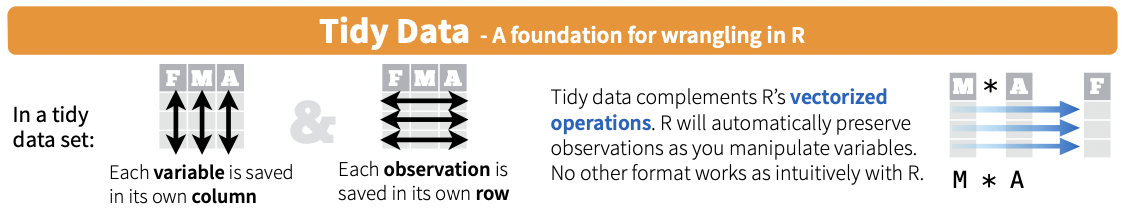

### select()

select() selects columns of a data frame. The first argument to this function is the data frame (dats.ppi), and the subsequent arguments are the columns to keep.

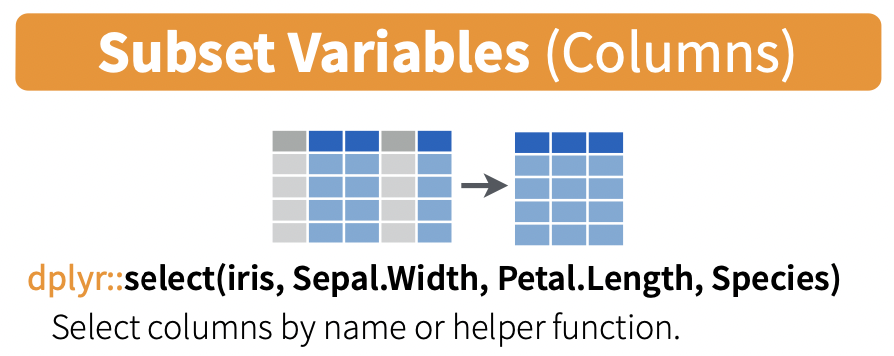

In [19]:
# inspect column names of dats.ppi
names(dats.ppi)

[1] "file.name"           "experiment.name"     "schedule.file"      
 [4] "ToneFreq"            "FloordB"             "protocol"           
 [7] "animal.id"           "Strain"              "awt_months"         
[10] "awt_days"            "Sex"                 "dot"                
[13] "PPdB"                "ppi.std"             "ppi.std.sem"        
[16] "method"              "metric"              "N.ref.startles"     
[19] "N.inhib.startles"    "N.ref.nonstartles"   "N.inhib.nonstartles"
[22] "per.startles.ref"    "per.startles.inhib"  "mean.metric.ref"    
[25] "mean.metric.inhib"

In [20]:
# use select() to select columns of interest
select(dats.ppi, animal.id, Strain, Sex, awt_months)

animal.id Strain  Sex awt_months
1     1283      CBA/CaJ M   24        
2     1283      CBA/CaJ M   24        
3     1283      CBA/CaJ M   24        
4     1283      CBA/CaJ M   24        
5     1283      CBA/CaJ M   24        
6     1283      CBA/CaJ M   24        
7     1283      CBA/CaJ M   24        
8     1283      CBA/CaJ M   24        
9     1283      CBA/CaJ M   24        
10    1283      CBA/CaJ M   24        
11    1283      CBA/CaJ M   24        
12    1283      CBA/CaJ M   24        
13    1283      CBA/CaJ M   24        
14    1283      CBA/CaJ M   24        
15    1283      CBA/CaJ M   24        
16    1283      CBA/CaJ M   24        
17    1283      CBA/CaJ M   24        
18    1283      CBA/CaJ M   24        
19    1283      CBA/CaJ M   24        
20    1283      CBA/CaJ M   24        
21    1283      CBA/CaJ M   24        
22    1283      CBA/CaJ M   24        
23    1283      CBA/CaJ M   24        
24    1283      CBA/CaJ M   24        
25    1283      CBA/CaJ M   24        
26    1283      CBA/CaJ M   24        
27    1283      CBA/CaJ M   24        
28    1283      CBA/CaJ M   24        
29    1283      CBA/CaJ M   24        
30    1283      CBA/CaJ M   24        
⋮     ⋮         ⋮       ⋮   ⋮         
81844 1704      CBA/CaJ F   22        
81845 1704      CBA/CaJ F   22        
81846 1704      CBA/CaJ F   22        
81847 1704      CBA/CaJ F   22        
81848 1704      CBA/CaJ F   22        
81849 1709      CBA/CaJ F   22        
81850 1709      CBA/CaJ F   22        
81851 1709      CBA/CaJ F   22        
81852 1709      CBA/CaJ F   22        
81853 1709      CBA/CaJ F   22        
81854 1710      CBA/CaJ F   22        
81855 1710      CBA/CaJ F   22        
81856 1710      CBA/CaJ F   22        
81857 1710      CBA/CaJ F   22        
81858 1710      CBA/CaJ F   22        
81859 1711      CBA/CaJ F   22        
81860 1711      CBA/CaJ F   22        
81861 1711      CBA/CaJ F   22        
81862 1711      CBA/CaJ F   22        
81863 1711      CBA/CaJ F   22        
81864 1712      CBA/CaJ F   22        
81865 1712      CBA/CaJ F   22        
81866 1712      CBA/CaJ F   22        
81867 1712      CBA/CaJ F   22        
81868 1712      CBA/CaJ F   22        
81869 1813      CBA/CaJ F   19        
81870 1813      CBA/CaJ F   19        
81871 1813      CBA/CaJ F   19        
81872 1813      CBA/CaJ F   19        
81873 1813      CBA/CaJ F   19

### filter()

filter() selects rows of a data frame. This is identical to using the square bracket approach to subsetting we've discussed (e.g., dats.ppi[Sex == "F"]).

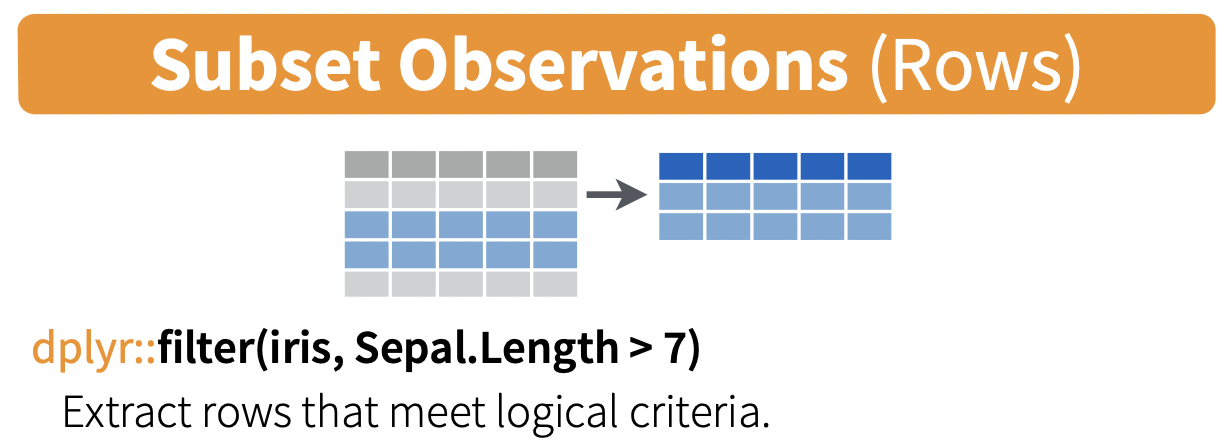

In [22]:
# use filter() to select observations (rows) of interest
filter(dats.ppi, per.startles.inhib > 0.9)
dats.ppi[per.startles.inhib > 0.9]

file.name               experiment.name  schedule.file                
1     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
2     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
3     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
4     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
5     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
6     092220_16APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
7     092220_16APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
8     092220_16APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
9     092220_16APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
10    09242020_10APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
11    09242020_10APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
12    09262020_16APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
13    09262020_16APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
14    09262020_16APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
15    09262020_24APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_24K_SIN.srsf        
16    09262020_24APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_24K_SIN.srsf        
17    09262020_24APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_24K_SIN.srsf        
18    092220_10APTPSIN_1287   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
19    092220_10APTPSIN_1287   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
20    092220_10APTPSIN_1287   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
21    09242020_10APTPSIN_1287 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
22    09262020_10APTPSIN_1287 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
23    09262020_10APTPSIN_1287 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
24    092220_16APTPCSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
25    092220_16APTPCSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
26    092220_16APTPCSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
27    092220_16APTPCSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
28    09242020_16ATPSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
29    09242020_16ATPSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
30    09242020_16ATPSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
⋮     ⋮                       ⋮                ⋮                            
29345 09102021_20NBPSIN_2182  NBPPI_20K_24K    SIN-NBPPI.srsf               
29346 10042021_20NBPSIN_2182  NBPPI_20K_24K    SIN-NBPPI.srsf               
29347 09062021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29348 09062021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29349 09062021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29350 09082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29351 09082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29352 09102021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29353 09102021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29354 09102021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29355 10042021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29356 10082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29357 10082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29358 10082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29359 09282021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29360 09282021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29361 09282021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29362 09282021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29363 09302021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29364 09302021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29

file.name               experiment.name  schedule.file                
1     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
2     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
3     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
4     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
5     092220_16APTPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
6     092220_16APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
7     092220_16APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
8     092220_16APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
9     092220_16APTPSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
10    09242020_10APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
11    09242020_10APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
12    09262020_16APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
13    09262020_16APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
14    09262020_16APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
15    09262020_24APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_24K_SIN.srsf        
16    09262020_24APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_24K_SIN.srsf        
17    09262020_24APTPSIN_1285 Tone-PPI-Airpuff Tone-PPI_24K_SIN.srsf        
18    092220_10APTPSIN_1287   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
19    092220_10APTPSIN_1287   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
20    092220_10APTPSIN_1287   Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
21    09242020_10APTPSIN_1287 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
22    09262020_10APTPSIN_1287 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
23    09262020_10APTPSIN_1287 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
24    092220_16APTPCSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
25    092220_16APTPCSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
26    092220_16APTPCSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
27    092220_16APTPCSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
28    09242020_16ATPSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
29    09242020_16ATPSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
30    09242020_16ATPSIN_1287  Tone-PPI-Airpuff Tone-PPI_16K_SIN.srsf        
⋮     ⋮                       ⋮                ⋮                            
29345 09102021_20NBPSIN_2182  NBPPI_20K_24K    SIN-NBPPI.srsf               
29346 10042021_20NBPSIN_2182  NBPPI_20K_24K    SIN-NBPPI.srsf               
29347 09062021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29348 09062021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29349 09062021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29350 09082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29351 09082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29352 09102021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29353 09102021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29354 09102021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29355 10042021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29356 10082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29357 10082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29358 10082021_20NBPSIN_2183  NBPPI_20K_24K    SIN-NBPPI.srsf               
29359 09282021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29360 09282021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29361 09282021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29362 09282021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29363 09302021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29364 09302021_20NBPSIN_2261  NBPPI_20K_24K    SIN-NBPPI.srsf               
29

In [23]:
# you can combine multiple filter conditions into one command just like before
filter(dats.ppi, per.startles.inhib > 0.9 & awt_months == 20 & ToneFreq == 8000)

file.name              experiment.name  schedule.file         ToneFreq
1   07262021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
2   07262021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
3   07262021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
4   07262021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
5   07282021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
6   07302021_8TP_1727      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
7   07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
8   07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
9   07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
10  07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
11  07262021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
12  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
13  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
14  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
15  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
16  07282021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
17  07302021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
18  07302021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
19  07302021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
20  08022021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
21  08022021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
22  08022021_8TPSIN_1727   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
23  07262021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
24  07262021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
25  07262021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
26  07262021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
27  07282021_8TP_1741      Tone-PPI         Tone-PPI_8K_2018.srsf 8000    
28  07262021_8TPSIN_1741   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
29  07262021_8TPSIN_1741   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
30  07262021_8TPSIN_1741   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
⋮   ⋮                      ⋮                ⋮                     ⋮       
110 08262021_8APTPSIN_1760 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
111 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
112 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
113 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
114 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
115 09202021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
116 09242021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
117 09202021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
118 09202021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
119 09202021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
120 09222021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
121 09242021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
122 09242021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
123 09272021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
124 09292021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
125 09292021_8APTPSIN_1768 Tone-PPI-Airpuff Tone-PPI_8K_SIN.srsf  8000    
126 09292021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
127 09292021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
128 09292021_8TPSIN_1768   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
129 09202021_8TPSIN_1769   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
130 09222021_8TPSIN_1769   Tone-PPI         Tone-PPI_8K_SIN.srsf  8000    
131 09202021_8APTPSIN_1769 To

### Pipes (%>%)

But what if you wanted to select and filter? There are three ways to do this: use intermediate steps, nested functions, or pipes. With the intermediate steps, you essentially create a temporary data frame and use that as input to the next function. This can clutter up your workspace with lots of objects. You can also nest functions (i.e. one function inside of another). This is handy, but can be difficult to read if too many functions are nested as the process from inside out. The last option, pipes, are a fairly recent addition to R. Pipes let you take the output of one function and send it directly to the next, which is useful when you need to many things to the same data set. Pipes in R look like %>% and are made available via the magrittr package installed as part of dplyr.

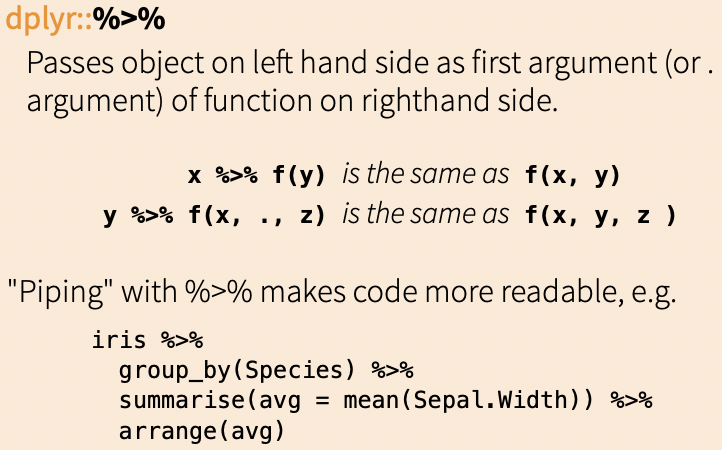

In [25]:
# use a pipe to pass a function onto a data frame
dats.ppi %>% filter(awt_months == 20)
filter(dats.ppi, awt_months == 20)

file.name              experiment.name schedule.file         ToneFreq
1    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
2    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
3    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
4    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
5    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
6    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
7    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
8    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
9    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
10   06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
11   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
12   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
13   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
14   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
15   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
16   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
17   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
18   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
19   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
20   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
21   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
22   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
23   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
24   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
25   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
26   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
27   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
28   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
29   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
30   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
⋮    ⋮                      ⋮               ⋮                     ⋮       
4978 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4979 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4980 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4981 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4982 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4983 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4984 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4985 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4986 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4987 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4988 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4989 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4990 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4991 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4992 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4993 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4994 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4995 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4996 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4997 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4998 10202021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4999 10202021_20NBPSIN_1828 NB

file.name              experiment.name schedule.file         ToneFreq
1    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
2    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
3    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
4    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
5    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
6    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
7    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
8    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
9    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
10   06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
11   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
12   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
13   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
14   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
15   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
16   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
17   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
18   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
19   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
20   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
21   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
22   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
23   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
24   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
25   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
26   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
27   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
28   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
29   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
30   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
⋮    ⋮                      ⋮               ⋮                     ⋮       
4978 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4979 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4980 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4981 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4982 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4983 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4984 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4985 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4986 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4987 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4988 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4989 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4990 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4991 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4992 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4993 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4994 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4995 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4996 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4997 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4998 10202021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4999 10202021_20NBPSIN_1828 NB

In [26]:
# notice that the earlier method provides identical output
filter(dats.ppi, awt_months == 20)

file.name              experiment.name schedule.file         ToneFreq
1    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
2    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
3    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
4    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
5    06092020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
6    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
7    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
8    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
9    06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
10   06112020_10TP_1312     Tone-PPI        Tone-PPI_10K_SIN.srsf 10000   
11   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
12   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
13   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
14   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
15   06092020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
16   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
17   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
18   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
19   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
20   06112020_16TP_1312     Tone-PPI        Tone-PPI_16K_SIN.srsf 16000   
21   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
22   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
23   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
24   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
25   06092020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
26   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
27   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
28   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
29   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
30   06112020_24TP_1312     Tone-PPI        Tone-PPI_24K_SIN.srsf 24000   
⋮    ⋮                      ⋮               ⋮                     ⋮       
4978 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4979 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4980 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4981 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4982 10182021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4983 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4984 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4985 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4986 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4987 10202021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4988 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4989 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4990 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4991 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4992 10222021_20NBPSIN_1827 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4993 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4994 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4995 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4996 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4997 10182021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4998 10202021_20NBPSIN_1828 NBPPI_20K_24K   SIN-NBPPI.srsf        NA      
4999 10202021_20NBPSIN_1828 NB

The difference here is that in the earlier method, you pass the data into the filter function. In the piping method, you pass the filter function onto the data.
I.e., filter(dats.ppi, awt_months == 20) vs. dats.ppi %>% filter(awt_months == 20).

This difference is most notable when passing multiple functions at once on the data.

In [27]:
# pass select and filter onto the data at the same time
dats.ppi %>%
    select(animal.id, Strain, Sex, awt_months) %>%
    filter(awt_months == 20)

animal.id Strain  Sex awt_months
1    1312      CBA/CaJ F   20        
2    1312      CBA/CaJ F   20        
3    1312      CBA/CaJ F   20        
4    1312      CBA/CaJ F   20        
5    1312      CBA/CaJ F   20        
6    1312      CBA/CaJ F   20        
7    1312      CBA/CaJ F   20        
8    1312      CBA/CaJ F   20        
9    1312      CBA/CaJ F   20        
10   1312      CBA/CaJ F   20        
11   1312      CBA/CaJ F   20        
12   1312      CBA/CaJ F   20        
13   1312      CBA/CaJ F   20        
14   1312      CBA/CaJ F   20        
15   1312      CBA/CaJ F   20        
16   1312      CBA/CaJ F   20        
17   1312      CBA/CaJ F   20        
18   1312      CBA/CaJ F   20        
19   1312      CBA/CaJ F   20        
20   1312      CBA/CaJ F   20        
21   1312      CBA/CaJ F   20        
22   1312      CBA/CaJ F   20        
23   1312      CBA/CaJ F   20        
24   1312      CBA/CaJ F   20        
25   1312      CBA/CaJ F   20        
26   1312      CBA/CaJ F   20        
27   1312      CBA/CaJ F   20        
28   1312      CBA/CaJ F   20        
29   1312      CBA/CaJ F   20        
30   1312      CBA/CaJ F   20        
⋮    ⋮         ⋮       ⋮   ⋮         
4978 1827      CBA/CaJ M   20        
4979 1827      CBA/CaJ M   20        
4980 1827      CBA/CaJ M   20        
4981 1827      CBA/CaJ M   20        
4982 1827      CBA/CaJ M   20        
4983 1827      CBA/CaJ M   20        
4984 1827      CBA/CaJ M   20        
4985 1827      CBA/CaJ M   20        
4986 1827      CBA/CaJ M   20        
4987 1827      CBA/CaJ M   20        
4988 1827      CBA/CaJ M   20        
4989 1827      CBA/CaJ M   20        
4990 1827      CBA/CaJ M   20        
4991 1827      CBA/CaJ M   20        
4992 1827      CBA/CaJ M   20        
4993 1828      CBA/CaJ M   20        
4994 1828      CBA/CaJ M   20        
4995 1828      CBA/CaJ M   20        
4996 1828      CBA/CaJ M   20        
4997 1828      CBA/CaJ M   20        
4998 1828      CBA/CaJ M   20        
4999 1828      CBA/CaJ M   20        
5000 1828      CBA/CaJ M   20        
5001 1828      CBA/CaJ M   20        
5002 1828      CBA/CaJ M   20        
5003 1828      CBA/CaJ M   20        
5004 1828      CBA/CaJ M   20        
5005 1828      CBA/CaJ M   20        
5006 1828      CBA/CaJ M   20        
5007 1828      CBA/CaJ M   20

Compare that code to the non-piping method, which is much more cluttered:

In [28]:
# apply the same functions on the data but separately (sans piping)
dats.ppi.select <- select(dats.ppi, animal.id, Strain, Sex, awt_months)
dats.ppi.select.filt <- filter(dats.ppi.select, awt_months == 20)
dats.ppi.select.filt

animal.id Strain  Sex awt_months
1    1312      CBA/CaJ F   20        
2    1312      CBA/CaJ F   20        
3    1312      CBA/CaJ F   20        
4    1312      CBA/CaJ F   20        
5    1312      CBA/CaJ F   20        
6    1312      CBA/CaJ F   20        
7    1312      CBA/CaJ F   20        
8    1312      CBA/CaJ F   20        
9    1312      CBA/CaJ F   20        
10   1312      CBA/CaJ F   20        
11   1312      CBA/CaJ F   20        
12   1312      CBA/CaJ F   20        
13   1312      CBA/CaJ F   20        
14   1312      CBA/CaJ F   20        
15   1312      CBA/CaJ F   20        
16   1312      CBA/CaJ F   20        
17   1312      CBA/CaJ F   20        
18   1312      CBA/CaJ F   20        
19   1312      CBA/CaJ F   20        
20   1312      CBA/CaJ F   20        
21   1312      CBA/CaJ F   20        
22   1312      CBA/CaJ F   20        
23   1312      CBA/CaJ F   20        
24   1312      CBA/CaJ F   20        
25   1312      CBA/CaJ F   20        
26   1312      CBA/CaJ F   20        
27   1312      CBA/CaJ F   20        
28   1312      CBA/CaJ F   20        
29   1312      CBA/CaJ F   20        
30   1312      CBA/CaJ F   20        
⋮    ⋮         ⋮       ⋮   ⋮         
4978 1827      CBA/CaJ M   20        
4979 1827      CBA/CaJ M   20        
4980 1827      CBA/CaJ M   20        
4981 1827      CBA/CaJ M   20        
4982 1827      CBA/CaJ M   20        
4983 1827      CBA/CaJ M   20        
4984 1827      CBA/CaJ M   20        
4985 1827      CBA/CaJ M   20        
4986 1827      CBA/CaJ M   20        
4987 1827      CBA/CaJ M   20        
4988 1827      CBA/CaJ M   20        
4989 1827      CBA/CaJ M   20        
4990 1827      CBA/CaJ M   20        
4991 1827      CBA/CaJ M   20        
4992 1827      CBA/CaJ M   20        
4993 1828      CBA/CaJ M   20        
4994 1828      CBA/CaJ M   20        
4995 1828      CBA/CaJ M   20        
4996 1828      CBA/CaJ M   20        
4997 1828      CBA/CaJ M   20        
4998 1828      CBA/CaJ M   20        
4999 1828      CBA/CaJ M   20        
5000 1828      CBA/CaJ M   20        
5001 1828      CBA/CaJ M   20        
5002 1828      CBA/CaJ M   20        
5003 1828      CBA/CaJ M   20        
5004 1828      CBA/CaJ M   20        
5005 1828      CBA/CaJ M   20        
5006 1828      CBA/CaJ M   20        
5007 1828      CBA/CaJ M   20

Even though both techniques can be done in 2 lines of code, the non-piping method forces you to assign the data to a new object as an intermediate step, then assigning that object yet again to another object in order to perform the filter.

The %>% allows you to chain an "infinite" number of functions onto the data all at once, making it extremely easy to perform high-level manipulations.

Additionally, if you wanted to create a new object with a manipulated version of the data, you could do so by assigning it a new name.

In [36]:
# assign the manipulated data through pipes to a new object
dats.ppi.sel.filt <- dats.ppi %>%
    select(animal.id, Strain, Sex, awt_months) %>%
    filter(awt_months == 20) %>%
    print


      animal.id  Strain Sex awt_months
   1:      1312 CBA/CaJ   F         20
   2:      1312 CBA/CaJ   F         20
   3:      1312 CBA/CaJ   F         20
   4:      1312 CBA/CaJ   F         20
   5:      1312 CBA/CaJ   F         20
  ---                                 
5003:      1828 CBA/CaJ   M         20
5004:      1828 CBA/CaJ   M         20
5005:      1828 CBA/CaJ   M         20
5006:      1828 CBA/CaJ   M         20
5007:      1828 CBA/CaJ   M         20


### mutate()

Frequently you’ll want to create new columns based on the values in existing columns, for example to do unit conversions or find the ratio of values in two columns. For this we’ll use mutate().

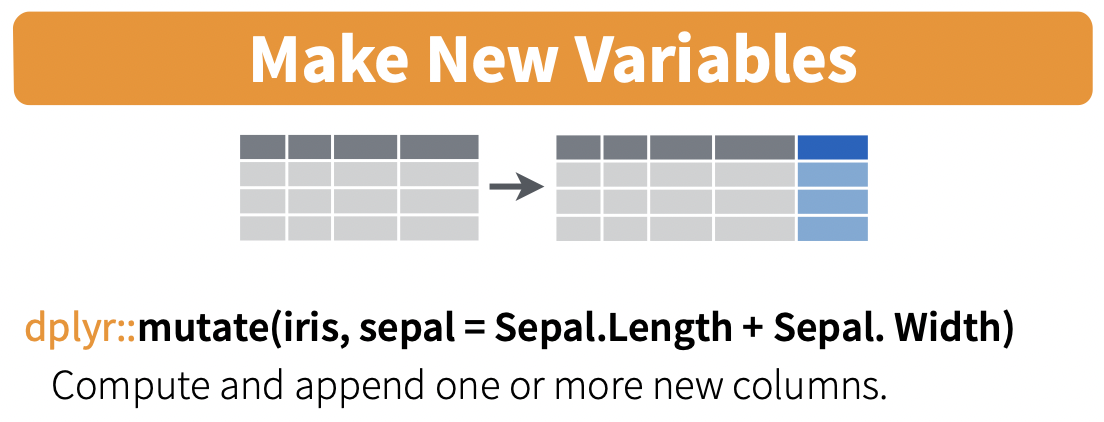

In [37]:
# use mutate() to create a new column of startle rate in percentage rather than ratio
# first argument is the name of the new column. Second is the "mutation" you are performing.
# * is the symbol for multiplication in R.
dats.ppi %>%
    mutate(startles.inhib.percentage = per.startles.inhib * 100)

file.name                experiment.name  schedule.file                
1     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
2     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
3     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
4     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
5     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
6     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
7     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
8     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
9     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
10    09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
11    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
12    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
13    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
14    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
15    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
16    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
17    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
18    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
19    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
20    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
21    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
22    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
23    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
24    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
25    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
26    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
27    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
28    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
29    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
30    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
⋮     ⋮                        ⋮                ⋮                            
81844 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81845 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81846 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81847 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81848 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81849 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81850 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81851 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81852 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81853 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81854 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81855 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81856 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81857 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81858 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81859 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81860 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81861 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81862 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81863 10052021_20NBPSIN_1711

If you look at the per.startles.inhib column and then the newly added startles.inhib.percentage column, you can see that the new column has multiplied the original values by 100.

In [38]:
# you can also reference multiple columns in your mutation
# (new column will always show up at the end of the data)
dats.ppi %>%
    mutate(total.startles = N.ref.startles + N.inhib.startles)

file.name                experiment.name  schedule.file                
1     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
2     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
3     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
4     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
5     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
6     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
7     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
8     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
9     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
10    09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
11    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
12    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
13    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
14    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
15    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
16    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
17    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
18    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
19    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
20    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
21    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
22    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
23    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
24    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
25    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
26    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
27    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
28    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
29    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
30    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
⋮     ⋮                        ⋮                ⋮                            
81844 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81845 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81846 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81847 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81848 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81849 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81850 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81851 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81852 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81853 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81854 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81855 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81856 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81857 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81858 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81859 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81860 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81861 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81862 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81863 10052021_20NBPSIN_1711

You also don't necessarily always need to create an entirely new column. For example, if you wanted to convert all of the ratio data into whole percentages, and have no reason to keep the original values, you could overwrite the original variables.

In [39]:
# convert startle rates to percentages without creating new columns
# simply set the "new column" equal to the old one (with the manipulation, i.e., x100).
dats.ppi %>%
    mutate(per.startles.ref = per.startles.ref * 100,
           per.startles.inhib = per.startles.inhib * 100)

file.name                experiment.name  schedule.file                
1     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
2     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
3     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
4     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
5     092220_10APTPSIN_1283    Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
6     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
7     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
8     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
9     09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
10    09242020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
11    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
12    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
13    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
14    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
15    09262020_10APTPSIN_1283  Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf        
16    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
17    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
18    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
19    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
20    092220_16APTPCSIN_1283   Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
21    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
22    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
23    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
24    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
25    09242020_16ATPCSIN_1283  Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
26    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
27    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
28    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
29    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
30    09262020_16APTPCSIN_1283 Tone-PPI-Airpuff Tone-PPI_16K_SIN_Control.srsf
⋮     ⋮                        ⋮                ⋮                            
81844 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81845 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81846 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81847 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81848 10092021_20NBPSIN_1704   NBPPI_20K_24K    SIN-NBPPI.srsf               
81849 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81850 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81851 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81852 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81853 10052021_20NBPSIN_1709   NBPPI_20K_24K    SIN-NBPPI.srsf               
81854 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81855 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81856 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81857 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81858 10052021_20NBPSIN_1710   NBPPI_20K_24K    SIN-NBPPI.srsf               
81859 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81860 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81861 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81862 10052021_20NBPSIN_1711   NBPPI_20K_24K    SIN-NBPPI.srsf               
81863 10052021_20NBPSIN_1711

### Split-Apply-Combine (group_by() and summarize())

Many data analysis tasks can be approached using the “split-apply-combine” paradigm: split the data into groups, apply some analysis to each group, and then combine the results. dplyr makes this very easy through the use of the group_by() function, which splits the data into groups. When the data is grouped in this way summarize() can be used to collapse each group into a single-row summary. summarize() does this by applying an aggregating or summary function to each group.

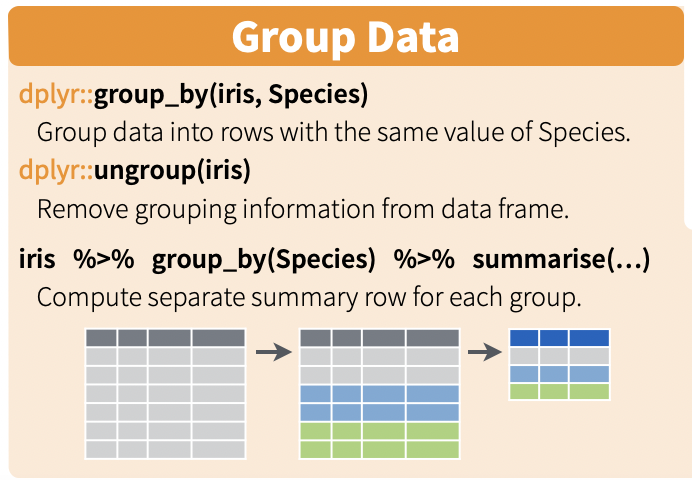

In [40]:
# use group_by() and summarize() to find the number of rows for each animal.id
dats.ppi %>%
    group_by(animal.id) %>%
    summarize(n.rows = n())

animal.id n.rows
1   1283      120   
2   1285      120   
3   1286      120   
4   1287      120   
5   1289      120   
6   1290       60   
7   1291       60   
8   1292       60   
9   1293      120   
10  1294      120   
11  1306      240   
12  1307      240   
13  1312      200   
14  1313      200   
15  1314      200   
16  1315      200   
17  1316      200   
18  1321      240   
19  1322      240   
20  1323      200   
21  1325      200   
22  1327      200   
23  1351      200   
24  1352      200   
25  1353      195   
26  1354      195   
27  1355      200   
28  1356      200   
29  1358      200   
30  1360      145   
⋮   ⋮         ⋮     
276 2262      282   
277 2263      262   
278 2267      192   
279 2268      172   
280 2298      192   
281 2299      192   
282 2300      192   
283 2301      192   
284 2302      192   
285 2311      120   
286 2328       96   
287 2329       96   
288 2330       96   
289 2334       96   
290 2335       96   
291 2336       96   
292 2337       96   
293 2338      192   
294 2339      192   
295 2340      192   
296 2341      192   
297 2342      192   
298 2343      192   
299 2344      192   
300 2345      108   
301 2346      108   
302 2347      108   
303 2348       96   
304 2349       96   
305 2350       96

Here the summary function used was n() to find the count for each group. We can also apply many other functions to individual columns to get other summary statistics. For example, in the R base package we can use built-in functions like mean, median, min, and max.

In [41]:
# view the mean ppi by mouse
dats.ppi %>%
    group_by(animal.id) %>%
    summarize(mean.ppi = mean(ppi.std))

animal.id mean.ppi  
1   1283              NA
2   1285              NA
3   1286              NA
4   1287      0.50171791
5   1289              NA
6   1290      0.35447017
7   1291      0.47579684
8   1292      0.06980705
9   1293      0.29211698
10  1294      0.47737884
11  1306      0.35158466
12  1307      0.39822234
13  1312      0.37841018
14  1313      0.37398664
15  1314      0.45186547
16  1315      0.41672282
17  1316      0.36748222
18  1321      0.31044137
19  1322      0.39511849
20  1323      0.32002476
21  1325      0.40516935
22  1327      0.41823190
23  1351      0.39634953
24  1352      0.31541965
25  1353      0.30836257
26  1354      0.39243754
27  1355      0.43194786
28  1356      0.36320644
29  1358      0.37561005
30  1360      0.33462795
⋮   ⋮         ⋮         
276 2262             NA 
277 2263      0.3761764 
278 2267             NA 
279 2268      0.4657435 
280 2298             NA 
281 2299             NA 
282 2300      0.3895548 
283 2301             NA 
284 2302      0.4698776 
285 2311      0.3820345 
286 2328      0.3499594 
287 2329             NA 
288 2330      0.3342891 
289 2334      0.3565434 
290 2335             NA 
291 2336             NA 
292 2337             NA 
293 2338             NA 
294 2339             NA 
295 2340             NA 
296 2341             NA 
297 2342             NA 
298 2343             NA 
299 2344             NA 
300 2345      0.3107220 
301 2346      0.4462692 
302 2347      0.3811542 
303 2348      0.5193435 
304 2349      0.2891165 
305 2350      0.3262101

By default, all R functions operating on vectors that contains missing data will return NA. It’s a way to make sure that users know they have missing data, and make a conscious decision on how to deal with it. When dealing with simple statistics like the mean, the easiest way to ignore NA (the missing data) is to use na.rm=TRUE (rm stands for remove).

In [42]:
# view the mean ppi by mouse while removing NAs
dats.ppi %>%
    group_by(animal.id) %>%
    summarize(mean.ppi = mean(ppi.std, na.rm = TRUE))

animal.id mean.ppi   
1   1283      -0.34222146
2   1285       0.41210505
3   1286      -0.88497461
4   1287       0.50171791
5   1289       0.36189326
6   1290       0.35447017
7   1291       0.47579684
8   1292       0.06980705
9   1293       0.29211698
10  1294       0.47737884
11  1306       0.35158466
12  1307       0.39822234
13  1312       0.37841018
14  1313       0.37398664
15  1314       0.45186547
16  1315       0.41672282
17  1316       0.36748222
18  1321       0.31044137
19  1322       0.39511849
20  1323       0.32002476
21  1325       0.40516935
22  1327       0.41823190
23  1351       0.39634953
24  1352       0.31541965
25  1353       0.30836257
26  1354       0.39243754
27  1355       0.43194786
28  1356       0.36320644
29  1358       0.37561005
30  1360       0.33462795
⋮   ⋮         ⋮          
276 2262       0.3425354 
277 2263       0.3761764 
278 2267       0.4418622 
279 2268       0.4657435 
280 2298       0.5570621 
281 2299       0.6255682 
282 2300       0.3895548 
283 2301       0.5592143 
284 2302       0.4698776 
285 2311       0.3820345 
286 2328       0.3499594 
287 2329      -2.3588804 
288 2330       0.3342891 
289 2334       0.3565434 
290 2335      -0.3907254 
291 2336       0.5094815 
292 2337       0.4834695 
293 2338       0.3590921 
294 2339      -1.8643272 
295 2340       0.3836600 
296 2341       0.4414126 
297 2342      -8.0914156 
298 2343       0.4985785 
299 2344       0.4455063 
300 2345       0.3107220 
301 2346       0.4462692 
302 2347       0.3811542 
303 2348       0.5193435 
304 2349       0.2891165 
305 2350       0.3262101

You can group by multiple columns too:

In [43]:
# group by multiple columns to find average ppi across mouse and frequency
dats.ppi %>%
    group_by(animal.id, ToneFreq) %>%
    summarize(mean.ppi = mean(ppi.std, na.rm = TRUE))

`summarise()` has grouped output by 'animal.id'. You can override using the `.groups` argument.



animal.id ToneFreq mean.ppi    
1    1283      10000    -0.410722986
2    1283      16000     0.113607127
3    1283      24000    -1.308186236
4    1285      10000     0.326955095
5    1285      16000     0.513432415
6    1285      24000     0.322699635
7    1286      10000    -0.754431466
8    1286      16000    -1.106750841
9    1286      24000    -0.592250960
10   1287      10000     0.393668454
11   1287      16000     0.552340384
12   1287      24000     0.534967723
13   1289      10000     0.343088264
14   1289      16000     0.308012303
15   1289      24000     0.486776964
16   1290      10000     0.383891339
17   1290      16000     0.318881214
18   1290      24000     0.396226906
19   1291      10000     0.568153157
20   1291      16000     0.466362210
21   1291      24000     0.402309780
22   1292      10000    -0.217580026
23   1292      16000     0.243501568
24   1292      24000     0.009805089
25   1293      10000     0.167668235
26   1293      16000     0.373656967
27   1293      24000     0.287817215
28   1294      10000     0.479509212
29   1294      16000     0.585291333
30   1294      24000     0.259423477
⋮    ⋮         ⋮        ⋮           
1173 2341       8000      0.3655032 
1174 2341      16000      0.4198959 
1175 2341      32000      0.5439964 
1176 2342       8000     -1.0852280 
1177 2342      16000    -19.7886093 
1178 2342      32000     -2.3370282 
1179 2343       8000      0.3520109 
1180 2343      16000      0.5292902 
1181 2343      32000      0.6057297 
1182 2344       8000      0.3418538 
1183 2344      16000      0.4903238 
1184 2344      32000      0.4844224 
1185 2345       8000      0.2274662 
1186 2345      16000      0.4024533 
1187 2345      32000      0.2578605 
1188 2346       8000      0.4580573 
1189 2346      16000      0.4737565 
1190 2346      32000      0.3936935 
1191 2347       8000      0.3664036 
1192 2347      16000      0.4257785 
1193 2347      32000      0.3296883 
1194 2348       8000      0.3480848 
1195 2348      16000      0.6346106 
1196 2348      32000      0.5112977 
1197 2349       8000      0.1044416 
1198 2349      16000      0.4301163 
1199 2349      32000      0.2544585 
1200 2350       8000      0.2000937 
1201 2350      16000      0.4295396 
1202 2350      32000      0.2915919

Additionally, you can summarize multiple variables at the same time.

In [44]:
dats.ppi %>%
    group_by(animal.id, ToneFreq) %>%
    summarize(mean.ppi = mean(ppi.std, na.rm = TRUE),
              mean.startle.rate.ref = mean(per.startles.ref))

`summarise()` has grouped output by 'animal.id'. You can override using the `.groups` argument.



animal.id ToneFreq mean.ppi     mean.startle.rate.ref
1    1283      10000    -0.410722986 0.6047619            
2    1283      16000     0.113607127 0.5393939            
3    1283      24000    -1.308186236 0.2888889            
4    1285      10000     0.326955095 0.7857143            
5    1285      16000     0.513432415 0.8121212            
6    1285      24000     0.322699635 0.4777778            
7    1286      10000    -0.754431466 0.3380952            
8    1286      16000    -1.106750841 0.2000000            
9    1286      24000    -0.592250960 0.1500000            
10   1287      10000     0.393668454 0.9666667            
11   1287      16000     0.552340384 0.9484848            
12   1287      24000     0.534967723 0.9722222            
13   1289      10000     0.343088264 0.9000000            
14   1289      16000     0.308012303 0.8848485            
15   1289      24000     0.486776964 0.9055556            
16   1290      10000     0.383891339 0.8111111            
17   1290      16000     0.318881214 0.8555556            
18   1290      24000     0.396226906 0.7666667            
19   1291      10000     0.568153157 0.8000000            
20   1291      16000     0.466362210 0.8666667            
21   1291      24000     0.402309780 0.9333333            
22   1292      10000    -0.217580026 0.7222222            
23   1292      16000     0.243501568 0.6944444            
24   1292      24000     0.009805089 0.6888889            
25   1293      10000     0.167668235 0.9428571            
26   1293      16000     0.373656967 0.9454545            
27   1293      24000     0.287817215 0.9055556            
28   1294      10000     0.479509212 0.9000000            
29   1294      16000     0.585291333 0.9222222            
30   1294      24000     0.259423477 0.7444444            
⋮    ⋮         ⋮        ⋮            ⋮                    
1173 2341       8000      0.3655032  0.8820988            
1174 2341      16000      0.4198959  0.8626984            
1175 2341      32000      0.5439964  0.9123457            
1176 2342       8000     -1.0852280  0.1814815            
1177 2342      16000    -19.7886093  0.2277778            
1178 2342      32000     -2.3370282  0.3543210            
1179 2343       8000      0.3520109  0.9222222            
1180 2343      16000      0.5292902  0.9027778            
1181 2343      32000      0.6057297  0.9222222            
1182 2344       8000      0.3418538  0.9407407            
1183 2344      16000      0.4903238  0.8976190            
1184 2344      32000      0.4844224  0.9246914            
1185 2345       8000      0.2274662  0.8989247            
1186 2345      16000      0.4024533  0.9239130            
1187 2345      32000      0.2578605  0.8989247            
1188 2346       8000      0.4580573  0.8451613            
1189 2346      16000      0.4737565  0.7985507            
1190 2346      32000      0.3936935  0.8344086            
1191 2347       8000      0.3664036  0.9268817            
1192 2347      16000      0.4257785  0.9195652            
1193 2347      32000      0.3296883  0.9311828            
1194 2348       8000      0.3480848  0.9358025            
1195 2348      16000      0.6346106  0.9134921            
1196 2348      32000      0.5112977  0.9580247            
1197 2349       8000      0.1044416  0.9753086            
1198 2349      16000      0.4301163  0.9769841            
1199 2349      32000      0.2544585  0.9592593            
1200 2350       8000      0.2000937  0.9950617            
1201 2350      16000      0.4295396  0.9706349            
1202 2350      32000      0.2915919  1.0000000

Take note that performing manipulations in dplyr changes data.frames/data.tables to tbl_dfs (tibbles). This is a data structure that's very similar to a data frame. Take a look at the differences when printing the same data structure:

In [45]:
# print dats.ppi without any dplyr function
# see the output of a data table
dats.ppi %>%
    print

                    file.name  experiment.name         schedule.file ToneFreq
    1:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
    2:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
    3:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
    4:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
    5:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
   ---                                                                       
81869: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
81870: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
81871: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
81872: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
81873: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
       FloordB  protocol animal.id  Strain awt_months awt_days S

In [46]:
# print dats.ppi with an empty group_by function
# function does not do anything, but you can see the output of a tibble
dats.ppi %>%
    group_by() %>%
    print

# A tibble: 81,873 × 25
   file.name   experiment.name schedule.file ToneFreq FloordB protocol animal.id
   <chr>       <chr>           <chr>            <int>   <int> <chr>        <int>
 1 092220_10A… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
 2 092220_10A… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
 3 092220_10A… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
 4 092220_10A… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
 5 092220_10A… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
 6 09242020_1… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
 7 09242020_1… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
 8 09242020_1… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
 9 09242020_1… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
10 09242020_1… Tone-PPI-Airpu… Tone-PPI_10K…    10000      65 10APTPS…      1283
# … 

Usually, you can use data tables and tibbles synonymously. However, I have experienced some issues when working with tibbles in ggplot, so I always convert tibbles back to data tables by piping as.data.table() to the end of the dplyr chain.

In [47]:
# convert tibble back to data table in the same dplyr chain
dats.ppi %>%
    group_by() %>%
    as.data.table() %>%
    print

                    file.name  experiment.name         schedule.file ToneFreq
    1:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
    2:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
    3:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
    4:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
    5:  092220_10APTPSIN_1283 Tone-PPI-Airpuff Tone-PPI_10K_SIN.srsf    10000
   ---                                                                       
81869: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
81870: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
81871: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
81872: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
81873: 10122021_20NBPSIN_1813    NBPPI_20K_24K        SIN-NBPPI.srsf       NA
       FloordB  protocol animal.id  Strain awt_months awt_days S

## Exercise 2: Manipulate a Behavioral Dataset

Now that we have the basics of dplyr() down, let's work together to perform some manipulations on a behavioral dataset.

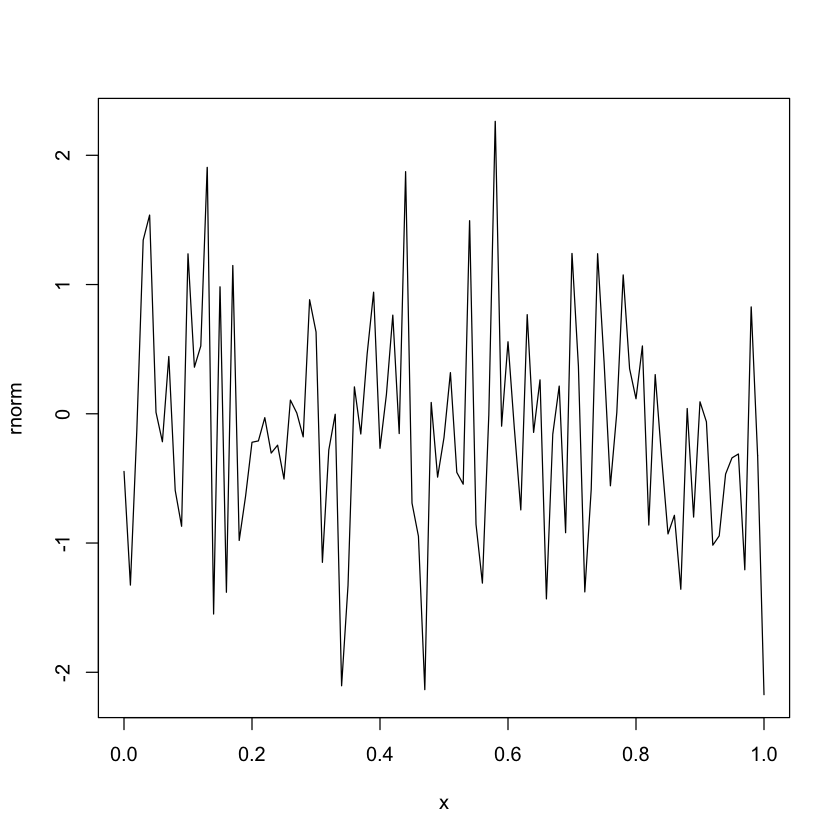

In [49]:
plot(rnorm)